# Import Dependencies

In [4]:
import pandas as pd
import nltk
from tqdm import tqdm
import re
import ast

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load data

In [5]:
df = pd.read_csv('data/PPN_clean.csv')
df.head()

,full_text,lower_case,remove_slang,remove_elongation,emoji_to_text,tweet_tokens,stem,remove_stopwords,remove_stop_words_nltk
0,@likromiahooy Paginya ppn naik 12%,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,@likromiahooy paginya ppn naik 12,"['paginya', 'ppn', 'naik', '12']","['pagi', 'ppn', 'naik', '12']","['pagi', 'ppn', '12']","['pagi', 'ppn', '12']"
1,@AdamVelcro 1. Krn sudah dikondisikan di media...,@adamvelcro 1 krn sudah dikondisikan di media ...,@adamvelcro 1 karena sudah dikondisikan di med...,@adamvelcro 1 karena sudah dikondisikan di med...,@adamvelcro 1 karena sudah dikondisikan di med...,"['1', 'karena', 'sudah', 'dikondisikan', 'di',...","['1', 'karena', 'sudah', 'kondisi', 'di', 'med...","['1', 'kondisi', 'media', 'kenaikan', 'ppn', '...","['1', 'kondisi', 'media', 'kenaikan', 'ppn', '..."
2,@exhumaclown rapat ppn krn naik jadi 12% kah?,@exhumaclown rapat ppn krn naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,@exhumaclown rapat ppn karena naik jadi 12 kah,"['rapat', 'ppn', 'karena', 'naik', 'jadi', '12...","['rapat', 'ppn', 'karena', 'naik', 'jadi', '12...","['rapat', 'ppn', '12', 'kah']","['rapat', 'ppn', '12']"
3,Apakah ini hari pemborosan sebelum ppn naik 12%?,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,apakah ini hari pemborosan sebelum ppn naik 12,"['apakah', 'ini', 'hari', 'pemborosan', 'sebel...","['apakah', 'ini', 'hari', 'boros', 'belum', 'p...","['boros', 'ppn', '12']","['boros', 'ppn', '12']"
4,@kompascom Kl pabrik / usaha nya yg memproduks...,@kompascom kl pabrik usaha nya yg memproduksi...,@kompascom kalo pabrik usaha nya yang memprod...,@kompascom kalo pabrik usaha nya yang memprod...,@kompascom kalo pabrik usaha nya yang memprod...,"['kalo', 'pabrik', 'usaha', 'nya', 'yang', 'me...","['kalau', 'pabrik', 'usaha', 'nya', 'yang', 'm...","['pabrik', 'usaha', 'nya', 'memproduksi', 'pro...","['pabrik', 'usaha', 'memproduksi', 'produk', '..."


get subset

In [6]:
corpus  = df[['remove_stop_words_nltk']].copy()
corpus

,remove_stop_words_nltk
0,"['pagi', 'ppn', '12']"
1,"['1', 'kondisi', 'media', 'kenaikan', 'ppn', '..."
2,"['rapat', 'ppn', '12']"
3,"['boros', 'ppn', '12']"
4,"['pabrik', 'usaha', 'memproduksi', 'produk', '..."
...,...
306,"['pasrah', 'nrimo', 'ing', 'pandum', 'nek', 'p..."
307,"['bilang', 'ppn', '12', 'sasar', 'barang', 'me..."
308,"['ppn', '12', 'tanda', 'kenaikan', 'duit', '12']"
309,"['ppn', '12', 'duit', 'negara', 'masyarakat', ..."


In [7]:
corpus['remove_stop_words_nltk'] = corpus['remove_stop_words_nltk'].apply(lambda x: ast.literal_eval(x))
corpus

,remove_stop_words_nltk
0,"[pagi, ppn, 12]"
1,"[1, kondisi, media, kenaikan, ppn, 12, inisias..."
2,"[rapat, ppn, 12]"
3,"[boros, ppn, 12]"
4,"[pabrik, usaha, memproduksi, produk, pangan, k..."
...,...
306,"[pasrah, nrimo, ing, pandum, nek, ppn, 12, hore]"
307,"[bilang, ppn, 12, sasar, barang, mewah, doang,..."
308,"[ppn, 12, tanda, kenaikan, duit, 12]"
309,"[ppn, 12, duit, negara, masyarakat, potong, pr..."


In [8]:
corpus['string'] = corpus['remove_stop_words_nltk'].apply(lambda x: ' '.join(x))
corpus

,remove_stop_words_nltk,string
0,"[pagi, ppn, 12]",pagi ppn 12
1,"[1, kondisi, media, kenaikan, ppn, 12, inisias...",1 kondisi media kenaikan ppn 12 inisiasi pdip ...
2,"[rapat, ppn, 12]",rapat ppn 12
3,"[boros, ppn, 12]",boros ppn 12
4,"[pabrik, usaha, memproduksi, produk, pangan, k...",pabrik usaha memproduksi produk pangan kena pp...
...,...,...
306,"[pasrah, nrimo, ing, pandum, nek, ppn, 12, hore]",pasrah nrimo ing pandum nek ppn 12 hore
307,"[bilang, ppn, 12, sasar, barang, mewah, doang,...",bilang ppn 12 sasar barang mewah doang baca ha...
308,"[ppn, 12, tanda, kenaikan, duit, 12]",ppn 12 tanda kenaikan duit 12
309,"[ppn, 12, duit, negara, masyarakat, potong, pr...",ppn 12 duit negara masyarakat potong program a...


# Vector space model binary

In [32]:
vectorizer_binary = CountVectorizer(binary=True)
X_binary = vectorizer_binary.fit_transform(corpus['string'])
print(vectorizer_binary.get_feature_names_out())
pd.DataFrame(X_binary.toarray(), columns=vectorizer_binary.get_feature_names_out())

['011' '012' '02' ... 'zaman' 'zonk' 'zulhas']


,011,012,02,021,022,03,08133099932,10,100,1000,...,xmgh,yaelah,yalon,yaudahlah,yes,you,yourself,zaman,zonk,zulhas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#

# Bag of Words (BoW)

A Bag of words is a an approach to transform text into numerical representation

- Describes the occurrence of words within a document or a collection of documents (corpus)
- Builds a vocabulary of the words and a measure of their presence


In [9]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(corpus['string'])
pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

,011,012,02,021,022,03,08133099932,10,100,1000,...,xmgh,yaelah,yalon,yaudahlah,yes,you,yourself,zaman,zonk,zulhas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


with custom settings

In [18]:
vectorizer = CountVectorizer(max_df=0.9, min_df=2)
X_bow = vectorizer.fit_transform(corpus['string'])
pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

,02,10,100,11,1112,15,16,199,20,2024,...,upah,urgensi,urus,usaha,utang,voter,voters,wajib,warga,xl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF (Term Frequency - Inverse Document Frequency)


In [20]:
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus['string'])
pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

,011,012,02,021,022,03,08133099932,10,100,1000,...,xmgh,yaelah,yalon,yaudahlah,yes,you,yourself,zaman,zonk,zulhas
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
307,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
308,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
309,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Distribusi Frekuensi Kata


[('ppn', 331), ('12', 321), ('harga', 67), ('2', 44), ('rakyat', 36), ('pajak', 35), ('1', 33), ('barang', 28), ('banget', 27), ('beli', 27)]


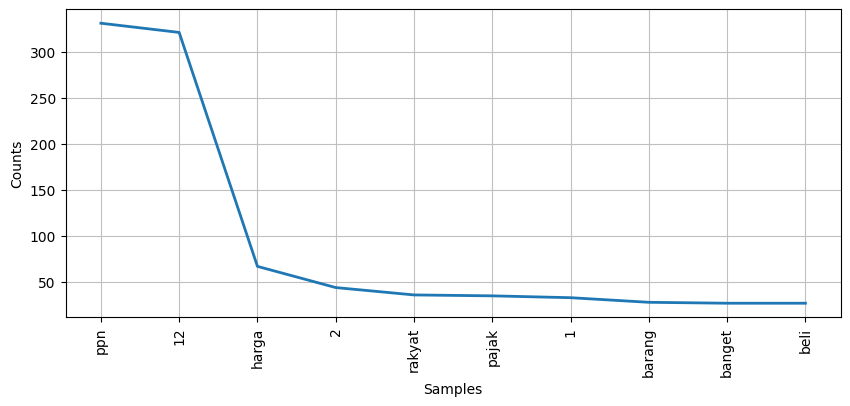

In [22]:
freq_dist = FreqDist(corpus['remove_stop_words_nltk'].sum())
print(freq_dist.most_common(10))

plt.figure(figsize=(10, 4))
freq_dist.plot(10, cumulative=False)
plt.show()

# N-grams

In [27]:
def generate_ngrams(text, n):
    words = word_tokenize(text.lower())
    return list(ngrams(words, n))

bigrams = generate_ngrams(" ".join(corpus['string']), 2)
trigrams = generate_ngrams(" ".join(corpus['string']), 3)

print("Contoh Bigrams:", bigrams[:5])
print("Contoh Trigrams:", trigrams[:5])

Contoh Bigrams: [('pagi', 'ppn'), ('ppn', '12'), ('12', '1'), ('1', 'kondisi'), ('kondisi', 'media')]
Contoh Trigrams: [('pagi', 'ppn', '12'), ('ppn', '12', '1'), ('12', '1', 'kondisi'), ('1', 'kondisi', 'media'), ('kondisi', 'media', 'kenaikan')]


# Word Embeddings (Word2Vec)

In [30]:
# Prepare the data for Word2Vec
sentences = corpus['remove_stop_words_nltk'].tolist()

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get the word vectors
word_vectors = model.wv

# Example: Get the vector for a specific word
word = 'ppn'
if word in word_vectors:
    print(f"Vector for '{word}':\n{word_vectors[word]}")
else:
    print(f"Word '{word}' not in vocabulary")

Vector for 'ppn':
[-3.37091764e-03  8.56227800e-03  7.48546980e-03  1.31438691e-02
 -8.08707625e-03 -2.39482410e-02  1.48047581e-02  3.39342505e-02
 -1.22485040e-02 -1.14783896e-02  2.67164712e-03 -1.64300743e-02
 -9.90438089e-03  1.22598866e-02 -7.08537118e-05 -7.88278319e-03
  7.75423273e-03 -9.99355968e-03 -1.17443027e-02 -2.71612536e-02
  1.16342148e-02  6.91092154e-03  1.36864875e-02 -3.70519725e-03
  7.07458146e-03 -4.74518863e-03 -1.04663987e-02  1.91248429e-03
 -1.37672657e-02  1.23617589e-03  8.69587064e-04 -3.41520854e-03
  1.27493450e-02 -1.60635747e-02 -3.57842795e-03  5.11312671e-03
  1.43830460e-02 -1.45267183e-02 -9.17510246e-04 -2.01859400e-02
 -1.05515746e-02  9.46592445e-06 -1.41304461e-02 -2.71652779e-03
  3.42463888e-03 -4.40493878e-03 -1.25630712e-02  1.29228728e-02
  9.79809090e-03  1.77274961e-02 -6.26216969e-03 -3.45081068e-03
 -8.44029523e-03 -1.24522345e-03  4.17327322e-03  1.22054631e-03
  1.55189270e-02 -5.74894762e-03 -1.37940180e-02  1.34599954e-02
 -5.164